# Activities List

## Exercise 1.

Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [51]:
import pandas as pd

url = 'marketing_customer_analysis_clean.csv'
df = pd.read_csv(url)

In [52]:
# Separate the columns
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

In [53]:
categoricals_df.employmentstatus.unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [54]:
categoricals_df['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [55]:
# Create new Dataframes splitt in nominal and ordinal
nominal_columns = ['state', 'response', 'employmentstatus', 'gender', 
                   'location_code', 'marital_status', 'policy_type', 
                   'sales_channel', 'policy','vehicle_class', 'vehicle_type', 'renew_offer_type']
nominal_df = categoricals_df[nominal_columns]

In [56]:
# Create new Dataframes splitt in nominal and ordinal
ordinal_columns = ['coverage','education', 'vehicle_size']
ordinal_df = categoricals_df[ordinal_columns]

In [57]:
# get_dummies with all the norminal columns
con_norminals_df = pd.get_dummies(nominal_df, dtype=int)
con_norminals_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
10906,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10907,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
10908,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0


In [58]:
from sklearn.preprocessing import OrdinalEncoder

# For 'coverage' column
enc = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium']])
ordinal_df['coverage'] = enc.fit_transform(ordinal_df[['coverage']])

# For 'education' column
enc = OrdinalEncoder(categories=[['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']])
ordinal_df['education'] = enc.fit_transform(ordinal_df[['education']])

# For 'vehicle_size' column
enc = OrdinalEncoder(categories=[['Small', 'Medsize', 'Large']])
ordinal_df['vehicle_size'] = enc.fit_transform(ordinal_df[['vehicle_size']])


C:\Users\vonke\AppData\Local\Temp\ipykernel_10600\2326745413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['coverage'] = enc.fit_transform(ordinal_df[['coverage']])
C:\Users\vonke\AppData\Local\Temp\ipykernel_10600\2326745413.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['education'] = enc.fit_transform(ordinal_df[['education']])
C:\Users\vonke\AppData\Local\Temp\ipykernel_10600\2326745413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [59]:
# Concat the two categorical Dataframes

result_categorical_df = pd.concat([ordinal_df, con_norminals_df], axis=1)
result_categorical_df

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4
0,0.0,2.0,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,1.0,1.0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,2.0,1.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
10906,0.0,2.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10907,1.0,1.0,1.0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
10908,2.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0


### Applying StandardScaler

In [60]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


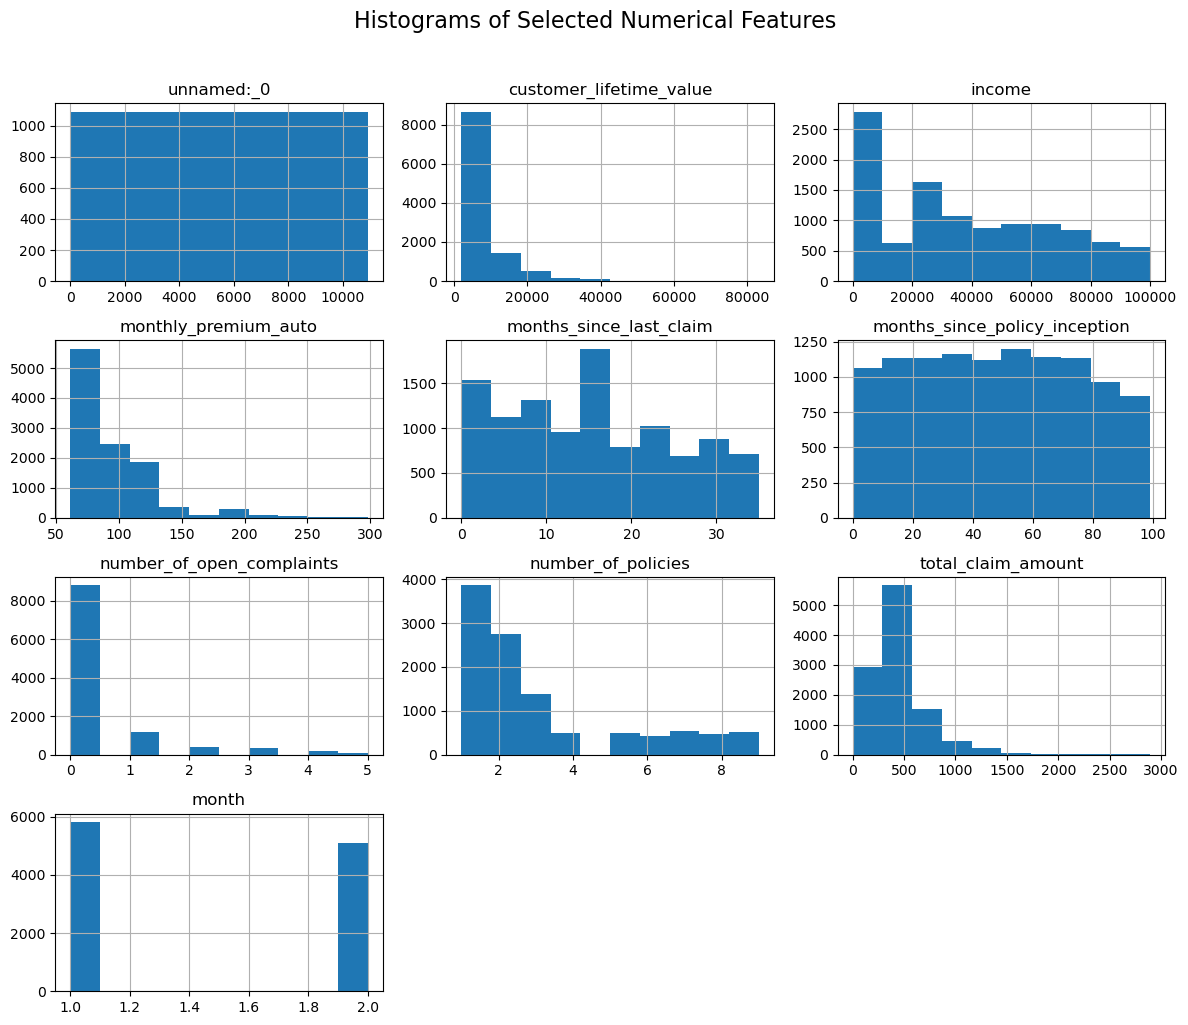

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming 'numericals_df' is your DataFrame with numerical features
# Replace it with your actual DataFrame

selected_columns = numericals_df.columns

# Calculate the required layout size
n_cols = len(selected_columns)
cols_per_row = 3
n_rows = math.ceil(n_cols / cols_per_row)

# Display histograms for specific numerical columns
numericals_df[selected_columns].hist(bins=10, figsize=(12, 10), layout=(n_rows, cols_per_row), sharex=False)
plt.suptitle('Histograms of Selected Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


<Axes: >

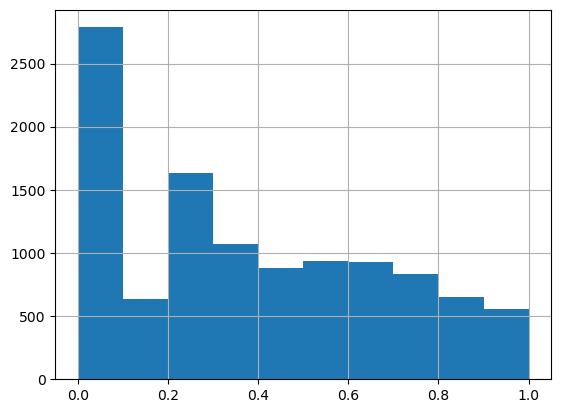

In [62]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
income_MM = scaler.fit_transform(numericals_df[['income']])
numericals_df['income_MM'] = income_MM
numericals_df['income_MM'].hist()

<Axes: >

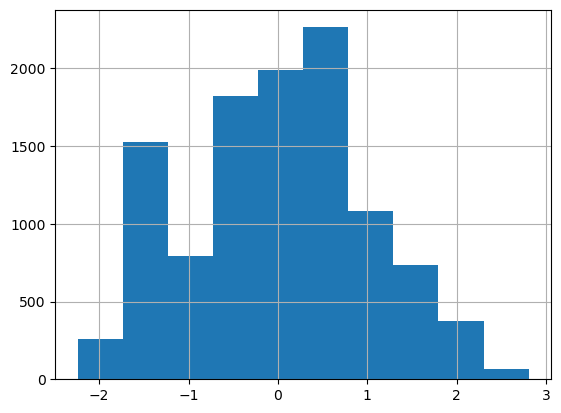

In [63]:
#PowerTransform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
numericals_df['customer_lifetime_value_pt'] = pt.fit_transform(numericals_df[['customer_lifetime_value']])
numericals_df['customer_lifetime_value_pt'].hist()

<Axes: >

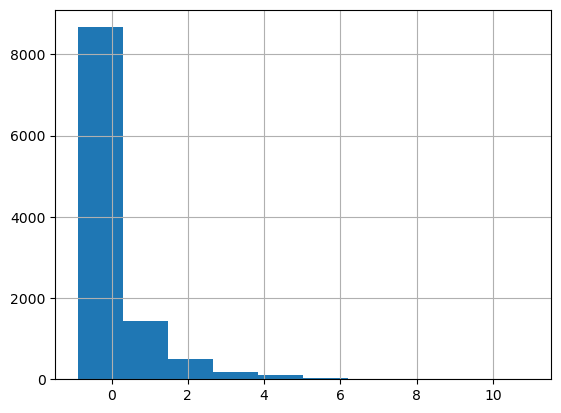

In [64]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardScaled_customer_lifetime_value = scaler.fit_transform(numericals_df[['customer_lifetime_value']])
numericals_df['customer_lifetime_value'] = standardScaled_customer_lifetime_value
numericals_df['customer_lifetime_value'].hist()